# Dom's Notebook

hypothesis:

(01/09/20)
- Taxo ID [7,8] fall into Exec and consult
- taxo ID [3,4,5,9] fall into specialists
- Taxo ID [1,2,6] are further divided by experience level
        - we weren't satisfied on the results of this grouping

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import wrangle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind


In [2]:
data = pd.read_excel('/Users/dom/codeup_data_science/capstone/kev/survey_responses.xlsx', )
data.head(2)

,q00,q01a,q01b,q01c,q02a,q02b,q02c,q02d,q02e,q02f,...,q14,q15,q16,q17a,q17b,q18a,q21,q22,q23,q09a
0,284,Academic,4,1.0,Often,Neutral,Never,Often,Often,Often,...,NaN,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background."
1,288,Academic,4,1.0,Occasionally,Neutral,Occasionally,Often,Often,Often,...,"Content, cost, timing (can I get away at this ...","Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research"


In [3]:
data_dictionary = pd.read_excel('../data_files/data_dictionary.xlsx')
data_dictionary.head()

,qid,column_name,is_required,from_orig_file,char_type,function,encoder,survey_section,question_group,question_text
0,q00,resp_id,True,True,numeric,identification,NaN,Survey,ID,Entry Id
1,q01a,job_title,True,True,text,categorical,NaN,Work,Position,Title
2,q01b,job_taxo,True,True,numeric,categorical,NaN,Work,Position,Job Taxo ID
3,q01c,job_id,True,True,numeric,categorical,NaN,Work,Position,Job ID
4,q02a,job_conduct_res,True,True,numeric,quantitative,often5,Work,Research Duties,Conducting Research


In [4]:
data.rename(columns = data_dictionary[['qid','column_name']].set_index('qid').column_name, inplace=True)
data.head(2)

,resp_id,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,...,how_pick_events,best_event,events_attend_recent,ideal_conference_size,ideal_conference_size_cat_orig,ideal_structure,ideal_topics,ideal_attendees,recommendations,research_educ
0,284,Academic,4,1.0,Often,Neutral,Never,Often,Often,Often,...,NaN,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background."
1,288,Academic,4,1.0,Occasionally,Neutral,Occasionally,Often,Often,Often,...,"Content, cost, timing (can I get away at this ...","Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research"


In [5]:
df = wrangle.wrangle_data()
df.head()

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,best_event,events_attend_recent,ideal_conference_size,ideal_conference_size_cat_orig,ideal_structure,ideal_topics,ideal_attendees,recommendations,research_educ,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background.",2.0
288,Academic,4,1.0,1,2,1,3,3,3,3,...,"Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research",2.0
294,Academic,4,1.0,3,3,1,3,1,3,3,...,Courses at Copenhagen University (deep knowle...,"Research Tuesdays (Czech), UX/Design Conferen...",It depends - I really enjoyed small conference...,7.0,It depends,NaN,NaN,Looking forward! \n,"Yes, I was taught how to conduct research",2.0
281,Academic,4,1.0,3,4,0,2,3,2,0,...,A workshop at the Society for Applied Anthropo...,A local education implementation conference.,Large conference: 500+ attendees,4.0,Multi-track: Every attendee chooses their own ...,"Research design, innovative methods, communica...",NaN,NaN,"Yes, I was taught how to conduct research",2.0
280,Academic,4,1.0,3,3,0,1,1,3,2,...,NaN,NaN,Large conference: 500+ attendees,4.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,NaN,"No, I was not taught how to conduct research",2.0


- Checking freds nlp functions

In [6]:
sys.path.append('../fred')
import nlp

In [7]:
mat, vect = nlp.create_tfidf_matrix(df.best_event)

#### Exploration

In [39]:
#dataframe
df.head(2)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,best_event,events_attend_recent,ideal_conference_size,ideal_conference_size_cat_orig,ideal_structure,ideal_topics,ideal_attendees,recommendations,research_educ,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background.",2.0
288,Academic,4,1.0,1,2,1,3,3,3,3,...,"Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research",2.0


In [40]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float]).columns
quant_cols.to_list()

['job_taxo',
 'job_id',
 'job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'num_employees',
 'num_researchers',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'factor_network',
 'session_keynote',
 'session_long_talk',

In [42]:
#Jobs by taxo id
    #1 is UX researchers
    #2 is Developers
    #3 is Researcher/Scientist
    #4 is Academic/Students
    #5 is Planners?
    #6 is Design/Research Managers
    #7 is Consultans
    #8 is Executive
    #9 is misc
data.groupby(['job_taxo', 'job_title']).job_title.count()

job_taxo  job_title              
1         Principal UX Researcher     44
          Senior UX Researcher        97
          UX Researcher              202
2         Principal UX Designer       28
          Senior UX Designer          25
          UX Designer                 87
3         Analyst                      5
          Anthropologist               3
          Behavioral economist         1
          Ethnographer                 1
          Market Researcher            4
          Research Scientist           1
          Researcher                   9
4         Academic                    23
          Student                      5
5         Content Strategist           4
          Engineer                    14
          Information Architect       11
          Product Manager             10
          Service Designer            10
          Strategist                  25
6         Design Manager              65
          Research Manager            70
7         Consultant   

In [23]:
df.groupby(['persona_id','job_taxo']).persona_id.count()

persona_id  job_taxo
1.0         7            62
            8            50
2.0         3            24
            4            28
            5            74
            9            12
3.0         1            93
            2            26
            6            84
4.0         1           191
            2            73
            6            43
5.0         1            45
            2            28
            6             3
Name: persona_id, dtype: int64

In [29]:
df.persona_id.value_counts()

4.0    307
3.0    203
2.0    138
1.0    112
5.0     76
Name: persona_id, dtype: int64

In [27]:
exp_cols = ['exp_conduct_res', 'exp_analyze_res',
           'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
           'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
           'exp_hire_res_vendor', 'exp_lead_res_team']
df[exp_cols].mean(axis = 1)

resp_id
284    5.0
288    4.7
294    3.6
281    0.6
280    2.0
      ... 
105    4.0
104    2.3
843    0.7
876    3.3
2      1.3
Length: 868, dtype: float64

In [ ]:
#show distributions of values


In [61]:
#establish features and target and split train and test data


x = quant_cols.drop(['job_id', 'likely_conference']).to_list()
y = ['likely_conference']
train, test = train_test_split(df[x+y].dropna(subset = y))

In [ ]:
#1/14/20
#use svm or 
#form hypothesis and test them

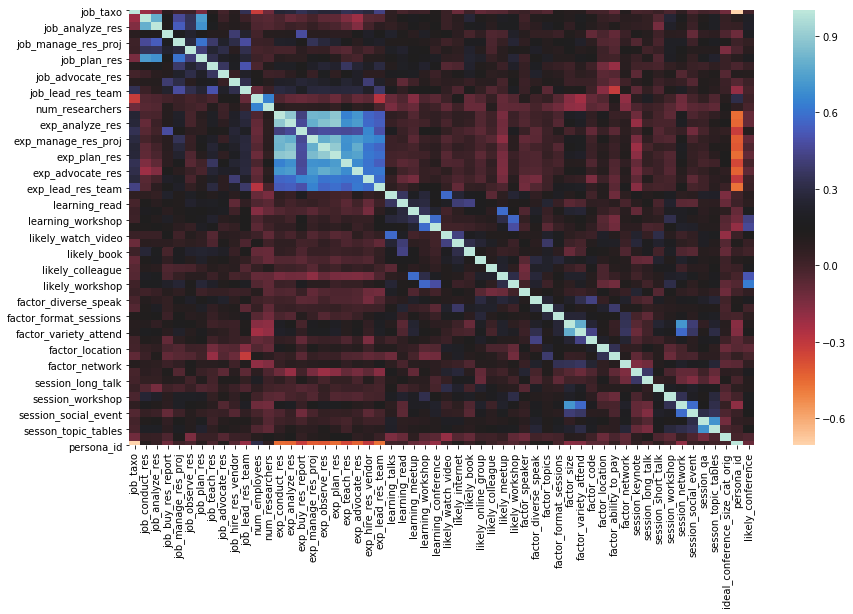

In [76]:
plt.figure(figsize=(14,8))
sns.heatmap(test.corr(), cmap = 'icefire_r')

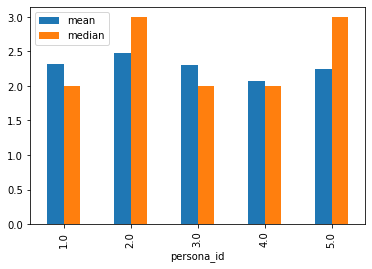

persona_id
1.0     78
2.0     97
3.0    151
4.0    226
5.0     53
Name: likely_conference, dtype: int64

In [89]:
train.groupby('persona_id').likely_conference.agg(['mean', 'median']).plot.bar()
plt.show()
train.groupby('persona_id').likely_conference.count()

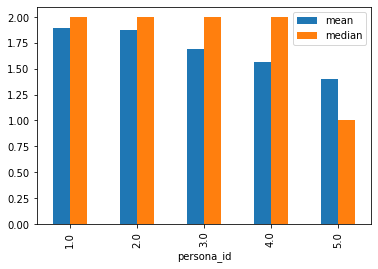

In [99]:
train.groupby('persona_id').learning_conference.agg(['mean', 'median']).plot.bar()
plt.show()


In [96]:
df['target'] = df[['learning_conference','likely_conference']].apply('mean', axis = 1)

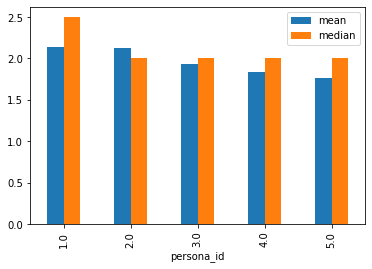

persona_id
1.0    105
2.0    128
3.0    197
4.0    302
5.0     75
Name: target, dtype: int64

In [100]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.show()
df.groupby('persona_id').target.count()

In [108]:
ttest_ind(df[(df.persona_id == 1)].target,df[(df.persona_id == 2)].target)

Ttest_indResult(statistic=0.038329465393023864, pvalue=0.9694581022356199)

In [110]:
ttest_ind(df[(df.persona_id == 1)].target,df[(df.persona_id == 3)].target)

Ttest_indResult(statistic=1.9142958081369854, pvalue=0.056533510385114234)

In [112]:
ttest_ind(df[(df.persona_id == 1)].target,df[(df.persona_id == 4)].target)

Ttest_indResult(statistic=3.2728386268110063, pvalue=0.0011560765310629614)

In [113]:
ttest_ind(df[(df.persona_id == 1)].target,df[(df.persona_id == 5)].target)

Ttest_indResult(statistic=2.7077362338275437, pvalue=0.007434911511818576)

In [114]:
ttest_ind(df[(df.persona_id == 2)].target,df[(df.persona_id == 3)].target)

Ttest_indResult(statistic=2.046606610979574, pvalue=0.04150583277631614)

In [115]:
ttest_ind(df[(df.persona_id == 2)].target,df[(df.persona_id == 4)].target)

Ttest_indResult(statistic=3.529891629782246, pvalue=0.00046081613406209504)

In [116]:
ttest_ind(df[(df.persona_id == 2)].target,df[(df.persona_id == 5)].target)

Ttest_indResult(statistic=2.910015640054613, pvalue=0.004021398099353864)

In [117]:
ttest_ind(df[(df.persona_id == 3)].target,df[(df.persona_id == 4)].target)

Ttest_indResult(statistic=1.3542497127821636, pvalue=0.1762721179674648)

In [118]:
ttest_ind(df[(df.persona_id == 3)].target,df[(df.persona_id == 5)].target)

Ttest_indResult(statistic=1.4614043917566018, pvalue=0.14506730551667094)

In [129]:
ttest_ind(df[(df.persona_id == 4)].target,df[(df.persona_id == 5)].target)[0]

0.6874219900814996

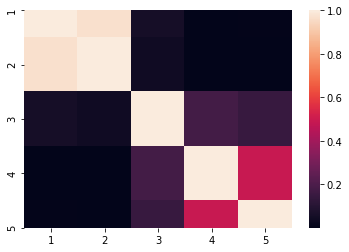

In [144]:
ttests = {}
row = {}
for i in range(1,6):
    for j in range(1,6):
        ttests[j] = ttest_ind(df[(df.persona_id == i)].target,df[(df.persona_id == j)].target)[1]
    row[i] = ttests.copy()
sns.heatmap(pd.DataFrame(row))


In [147]:
pd.DataFrame(row)

,1,2,3,4,5
1,1.000000,0.969458,0.056534,0.001156,0.007435
2,0.969458,1.000000,0.041506,0.000461,0.004021
3,0.056534,0.041506,1.000000,0.176272,0.145067
4,0.001156,0.000461,0.176272,1.000000,0.492242
5,0.007435,0.004021,0.145067,0.492242,1.000000


In [153]:
df[['job_taxo', 'persona_id', ]].join(pd.DataFrame(df[['exp_conduct_res', 'exp_analyze_res',
       'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
       'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
       'exp_hire_res_vendor', 'exp_lead_res_team']].apply(max, axis = 1), columns = ['experience']),)

,job_taxo,persona_id,experience
resp_id,,,
284,4,2.0,5.0
288,4,2.0,5.0
294,4,2.0,4.0
281,4,2.0,1.0
280,4,2.0,4.0
...,...,...,...
113,1,4.0,2.0
105,1,4.0,4.0
843,1,5.0,1.0


In [154]:
df.columns


Index(['job_title', 'job_taxo', 'job_id', 'job_conduct_res', 'job_analyze_res',
       'job_buy_res_report', 'job_manage_res_proj', 'job_observe_res',
       'job_plan_res', 'job_teach_res', 'job_advocate_res',
       'job_hire_res_vendor', 'job_lead_res_team', 'num_employees',
       'num_researchers', 'exp_conduct_res', 'exp_analyze_res',
       'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
       'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
       'exp_hire_res_vendor', 'exp_lead_res_team', 'learning_talks',
       'learning_read', 'learning_meetup', 'learning_workshop',
       'learning_conference', 'likely_watch_video', 'likely_internet',
       'likely_book', 'likely_online_group', 'likely_colleague',
       'likely_meetup', 'likely_conference', 'likely_workshop',
       'factor_speaker', 'factor_diverse_speak', 'factor_topics',
       'factor_format_sessions', 'factor_size', 'factor_variety_attend',
       'factor_code', 'factor_location', 'factor_abili

In [155]:
df.factor_size

resp_id
284    3.0
288    4.0
294    3.0
281    1.0
280    3.0
      ... 
113    2.0
105    3.0
843    NaN
876    1.0
2      1.0
Name: factor_size, Length: 807, dtype: float64